<a href="https://colab.research.google.com/github/hagisileo/PyTorch/blob/master/30_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0(%ED%95%99%EC%83%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 공공데이터 포털(data.go.kr)
    - 서울특별시_지하철 호선별 역별 승하차 인원 정보
- 서울특별시 대기환경정보 https://cleanair.seoul.go.kr/statistics/periodAverage

- 서울열린데이터광장
https://data.seoul.go.kr/


- 인천데이터포털
https://www.incheon.go.kr/data/index

- KOSIS 국가통계포털
https://kosis.kr/index/index.do

- MDIS 마이크로데이터 통합서비스
https://mdis.kostat.go.kr/index.do

In [ ]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,669 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# 데이터 분석을 위해 pandas, numpy
# 시각화를 위해 matplotlib, seaborn 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


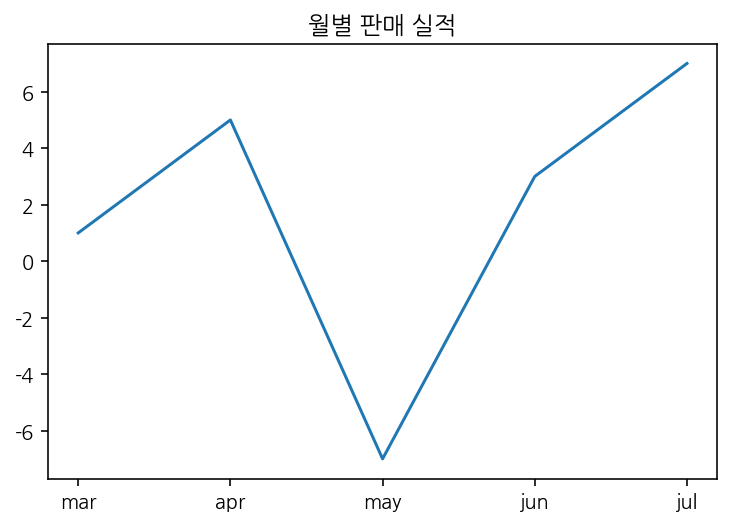

In [ ]:
mon = ['mar','apr','may','jun','jul']
sales = [1,5,-7,3,7]

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.title('월별 판매 실적')
plt.plot(mon, sales)
plt.show()

In [ ]:
path = '/gdrive/MyDrive/문제해결을위한파이썬/data/'

# 파일 읽기
- 서울시 지하철호선별 역별 승하차 인원 정보.csv

In [ ]:
df_main = pd.read_csv( path+'서울시 지하철호선별 역별 승하차 인원 정보.csv',  encoding='cp949')


In [ ]:
df_main

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220603,우이신설선,4.19민주묘지,3825,3705,20220606
1,20220603,경원선,가능,7578,7062,20220606
2,20220603,3호선,가락시장,10214,9882,20220606
3,20220603,8호선,가락시장,8009,9301,20220606
4,20220603,경부선,가산디지털단지,19423,22094,20220606
...,...,...,...,...,...,...
22689,20220427,경원선,회룡,13747,13550,20220430
22690,20220427,4호선,회현(남대문시장),26482,28231,20220430
22691,20220427,6호선,효창공원앞,7734,7110,20220430
22692,20220427,경의선,효창공원앞,3315,3687,20220430


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    22694 non-null  int64 
 1   호선명     22694 non-null  object
 2   역명      22694 non-null  object
 3   승차총승객수  22694 non-null  int64 
 4   하차총승객수  22694 non-null  int64 
 5   등록일자    22694 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.0+ MB


In [ ]:
df = df_main.iloc[ : , 0:5]

In [ ]:
df.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220603,우이신설선,4.19민주묘지,3825,3705
1,20220603,경원선,가능,7578,7062
2,20220603,3호선,가락시장,10214,9882
3,20220603,8호선,가락시장,8009,9301
4,20220603,경부선,가산디지털단지,19423,22094


# 결측값


In [ ]:
df.info

<bound method DataFrame.info of            사용일자    호선명         역명  승차총승객수  하차총승객수
0      20220603  우이신설선   4.19민주묘지    3825    3705
1      20220603    경원선         가능    7578    7062
2      20220603    3호선       가락시장   10214    9882
3      20220603    8호선       가락시장    8009    9301
4      20220603    경부선    가산디지털단지   19423   22094
...         ...    ...        ...     ...     ...
22689  20220427    경원선         회룡   13747   13550
22690  20220427    4호선  회현(남대문시장)   26482   28231
22691  20220427    6호선      효창공원앞    7734    7110
22692  20220427    경의선      효창공원앞    3315    3687
22693  20220427    9호선  흑석(중앙대입구)    9916    9959

[22694 rows x 5 columns]>

In [ ]:
# 호선명
df['호선명'].unique()

array(['우이신설선', '경원선', '3호선', '8호선', '경부선', '7호선', '9호선', '경의선', '분당선',
       '경춘선', '경인선', '2호선', '5호선', '공항철도 1호선', '경강선', '과천선', '6호선', '수인선',
       '안산선', '신림선', '중앙선', '4호선', '일산선', '1호선', '9호선2~3단계', '장항선'],
      dtype=object)

In [ ]:
df[df['호선명']  == '9호선2~3단계']

,사용일자,호선명,역명,승차총승객수,하차총승객수
171,20220603,9호선2~3단계,둔촌오륜,1027,959
239,20220603,9호선2~3단계,봉은사,20610,21176
262,20220603,9호선2~3단계,삼성중앙,7829,8265
266,20220603,9호선2~3단계,삼전,7466,6976
302,20220603,9호선2~3단계,석촌,9684,8453
...,...,...,...,...,...
22497,20220427,9호선2~3단계,언주,10791,11147
22529,20220427,9호선2~3단계,올림픽공원(한국체대),6408,6488
22601,20220427,9호선2~3단계,종합운동장,4316,4435
22611,20220427,9호선2~3단계,중앙보훈병원,11563,10258


In [ ]:
df.loc[df['호선명']  == '9호선2~3단계', '호선명'] = '9호선'

In [ ]:
df['호선명'].unique()

array(['우이신설선', '경원선', '3호선', '8호선', '경부선', '7호선', '9호선', '경의선', '분당선',
       '경춘선', '경인선', '2호선', '5호선', '공항철도 1호선', '경강선', '과천선', '6호선', '수인선',
       '안산선', '신림선', '중앙선', '4호선', '일산선', '1호선', '장항선'], dtype=object)

In [ ]:
df.head(3)

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220603,우이신설선,4.19민주묘지,3825,3705
1,20220603,경원선,가능,7578,7062
2,20220603,3호선,가락시장,10214,9882


In [ ]:
# 파생변수 - 날짜
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22694 entries, 0 to 22693
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    22694 non-null  int64 
 1   호선명     22694 non-null  object
 2   역명      22694 non-null  object
 3   승차총승객수  22694 non-null  int64 
 4   하차총승객수  22694 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 886.6+ KB


In [ ]:
# 형변화 astype()
df.사용일자 = df.사용일자.astype(str)
df.사용일자.dtype # dtype()는 데이터 프레임의 속성을 확인할 때 이용

dtype('O')

In [ ]:
df['월'] = df['사용일자'].str[4:6]
df['일'] = df['사용일자'].str[6:]

In [ ]:
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,월,일
0,20220603,우이신설선,4.19민주묘지,3825,3705,06,03
1,20220603,경원선,가능,7578,7062,06,03
2,20220603,3호선,가락시장,10214,9882,06,03
3,20220603,8호선,가락시장,8009,9301,06,03
4,20220603,경부선,가산디지털단지,19423,22094,06,03
...,...,...,...,...,...,...,...
22689,20220427,경원선,회룡,13747,13550,04,27
22690,20220427,4호선,회현(남대문시장),26482,28231,04,27
22691,20220427,6호선,효창공원앞,7734,7110,04,27
22692,20220427,경의선,효창공원앞,3315,3687,04,27


In [ ]:
df['월'].dtype

dtype('O')

In [ ]:
# pd.to_numeric()
df['월'] = pd.to_numeric(df['월'])
df['일'] = pd.to_numeric(df['일'])


In [ ]:
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,월,일
0,20220603,우이신설선,4.19민주묘지,3825,3705,6,3
1,20220603,경원선,가능,7578,7062,6,3
2,20220603,3호선,가락시장,10214,9882,6,3
3,20220603,8호선,가락시장,8009,9301,6,3
4,20220603,경부선,가산디지털단지,19423,22094,6,3
...,...,...,...,...,...,...,...
22689,20220427,경원선,회룡,13747,13550,4,27
22690,20220427,4호선,회현(남대문시장),26482,28231,4,27
22691,20220427,6호선,효창공원앞,7734,7110,4,27
22692,20220427,경의선,효창공원앞,3315,3687,4,27


In [ ]:
# 전체 승객수 
df['전체승객수'] = df['승차총승객수'] + df['하차총승객수']

#[분석1] 
- 5월의 사용자인원이 많았던 노선


In [ ]:
df_5 = df[df['월'] == 5]

In [ ]:
df_5

,사용일자,호선명,역명,승차총승객수,하차총승객수,월,일,전체승객수
1819,20220531,우이신설선,4.19민주묘지,3878,3598,5,31,7476
1820,20220531,경원선,가능,7862,7446,5,31,15308
1821,20220531,3호선,가락시장,10029,10028,5,31,20057
1822,20220531,8호선,가락시장,8357,9586,5,31,17943
1823,20220531,경부선,가산디지털단지,20785,23623,5,31,44408
...,...,...,...,...,...,...,...,...
20310,20220501,경원선,회룡,8344,8335,5,1,16679
20311,20220501,4호선,회현(남대문시장),10438,10632,5,1,21070
20312,20220501,6호선,효창공원앞,3636,3373,5,1,7009
20313,20220501,경의선,효창공원앞,1441,1680,5,1,3121


In [ ]:
최고_5월 = df_5['전체승객수'].max()

In [ ]:
df_5[df_5['전체승객수'] == 최고_5월]

,사용일자,호선명,역명,승차총승객수,하차총승객수,월,일,전체승객수
12593,20220513,2호선,강남,95342,98137,5,13,193479


In [ ]:
df_5[df_5['전체승객수'] == 최고_5월].values[0]

array(['20220513', '2호선', '강남', 95342, 98137, 5, 13, 193479], dtype=object)

In [ ]:
df_5[df_5['전체승객수'] == 최고_5월].values[0][2] # 이용자가 많은 역을 월을 바꾸더라도 쉽게 찾을 수 있음

'강남'

In [ ]:
결과 = df_5[df_5['전체승객수'] == 최고_5월]
결과

,사용일자,호선명,역명,승차총승객수,하차총승객수,월,일,전체승객수
12593,20220513,2호선,강남,95342,98137,5,13,193479


In [ ]:
월 = 결과['월'].values[0]
일 = 결과['일'].values[0]
인원수 = 결과['전체승객수'].values[0]


In [ ]:
print('5월의 전철 승객수가 가장 많은 날짜는', 월, '월', 일, '일입니다')
print('가장 많이 이용한 역은',결과['역명'].values[0],'역입니다.')

5월의 전철 승객수가 가장 많은 날짜는 5 월 13 일입니다
가장 많이 이용한 역은 강남 역입니다.


In [ ]:
print('승차인원은',결과['승차총승객수'].values[0], '명입니다.', '하차인원은', 결과['하차총승객수'].values[0] ,'명입니다' )
print('분석결과 서술')

승차인원은 95342 명입니다. 하차인원은 98137 명입니다
분석결과 서술


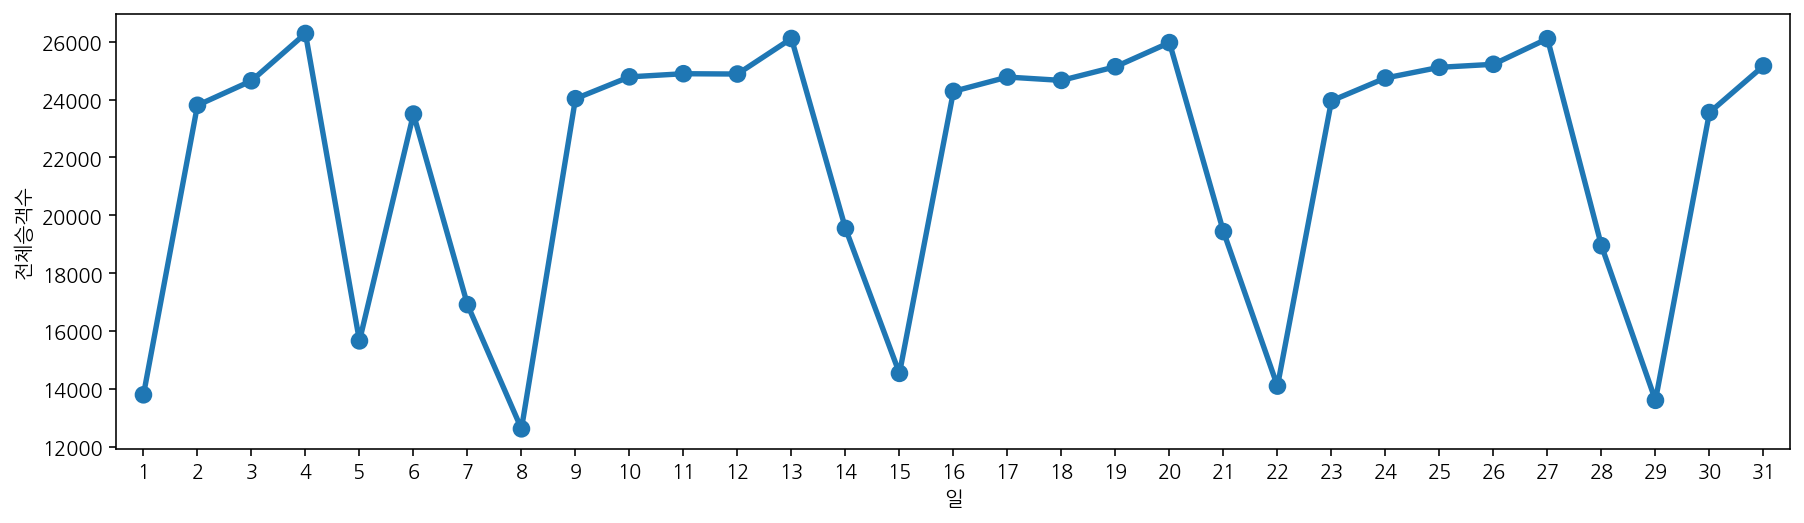

In [ ]:
# 날짜별
plt.figure(figsize=(15,4))
sns.pointplot(data=df_5, x= '일', y = '전체승객수', ci = None)

# [분석 2]
- 역별을 사용한 전체승객에 대한 정보


In [ ]:
#사용승객수가 많은 곳 10곳에 대한 정보
df_5.groupby('역명').mean()

,승차총승객수,하차총승객수,월,일,전체승객수
역명,,,,,
4.19민주묘지,3508.225806,3306.838710,5.0,16.0,6815.064516
가능,6736.419355,6385.838710,5.0,16.0,13122.258065
가락시장,7597.645161,7970.983871,5.0,16.0,15568.629032
가산디지털단지,25916.935484,27196.806452,5.0,16.0,53113.741935
가양,19591.516129,18846.258065,5.0,16.0,38437.774194
...,...,...,...,...,...
회기,25512.806452,24690.838710,5.0,16.0,50203.645161
회룡,12556.483871,12403.322581,5.0,16.0,24959.806452
회현(남대문시장),23463.645161,24775.000000,5.0,16.0,48238.645161


In [ ]:
df_최대승객10 = df_5.groupby('역명').mean().sort_values(by = "전체승객수", ascending = False).head(10)
df_최대승객10

,승차총승객수,하차총승객수,월,일,전체승객수
역명,,,,,
강남,75531.580645,76059.741935,5.0,16.000000,151591.322581
신림,53697.485714,51721.257143,5.0,17.542857,105418.742857
구로디지털단지,52535.032258,52211.387097,5.0,16.000000,104746.419355
삼성(무역센터),46094.193548,46875.225806,5.0,16.000000,92969.419355
서울대입구(관악구청),45713.612903,44912.258065,5.0,16.000000,90625.870968
역삼,42113.935484,48040.516129,5.0,16.000000,90154.451613
잠실(송파구청),42437.306452,43239.419355,5.0,16.000000,85676.725806
영등포,39870.387097,41240.677419,5.0,16.000000,81111.064516
용산,38393.322581,39111.709677,5.0,16.000000,77505.032258


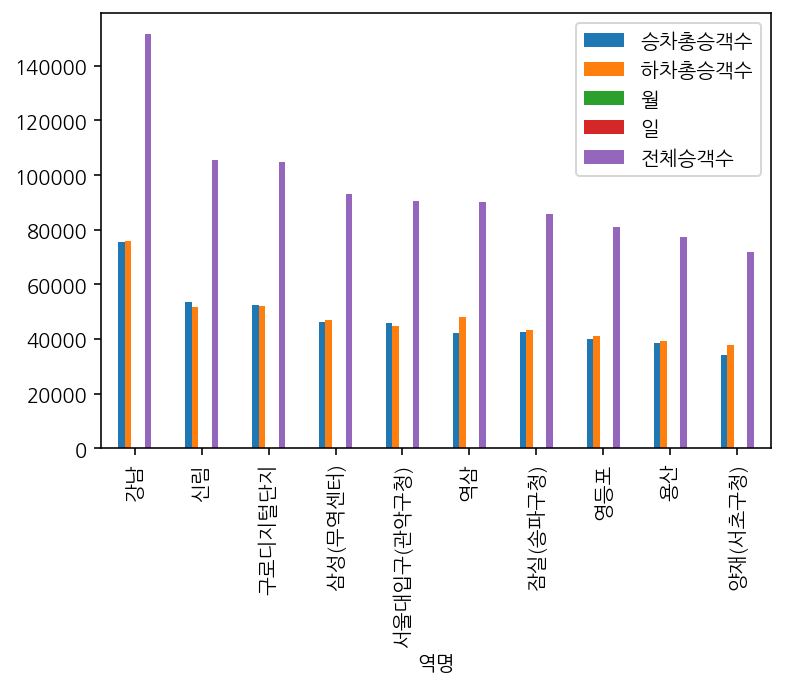

In [ ]:
df_최대승객10.plot.bar()

In [ ]:
df_최대승객10.pivot_table(index = '역명', values = '전체승객수')

,전체승객수
역명,
강남,151591.322581
구로디지털단지,104746.419355
삼성(무역센터),92969.419355
서울대입구(관악구청),90625.870968
신림,105418.742857
양재(서초구청),71850.064516
역삼,90154.451613
영등포,81111.064516
용산,77505.032258


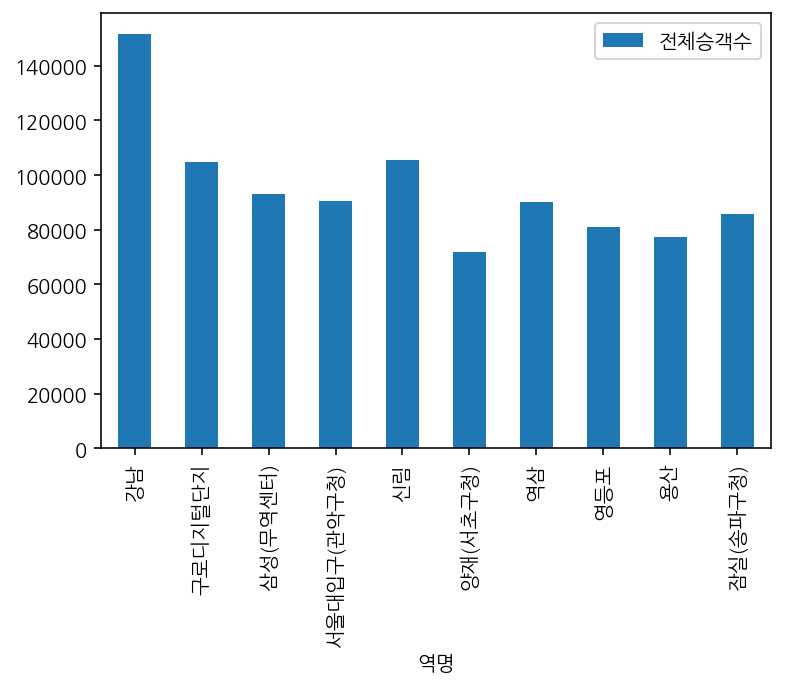

In [ ]:
df_최대승객10.pivot_table(index = '역명', values = '전체승객수').plot.bar()

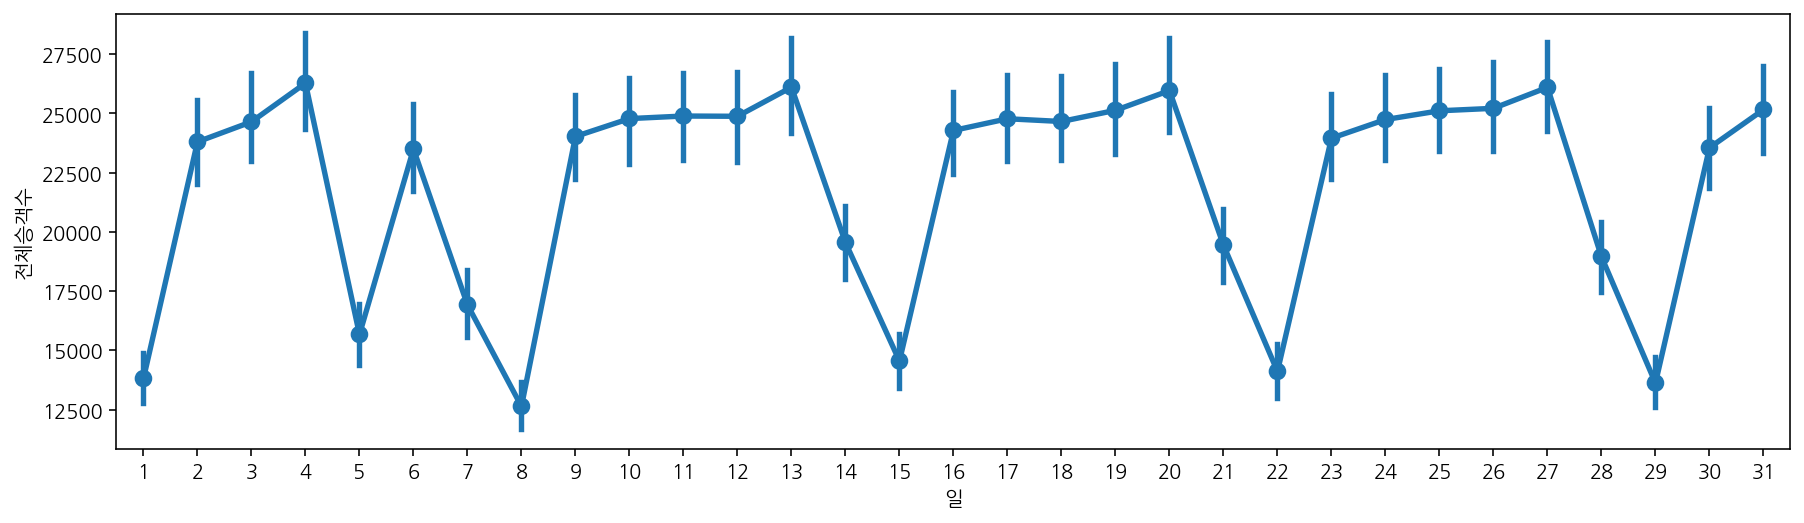

In [ ]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_5, x = '일', y = '전체승객수')
sns.pointplot(data = df_5, x = '일', y = '전체승객수', ci=None)

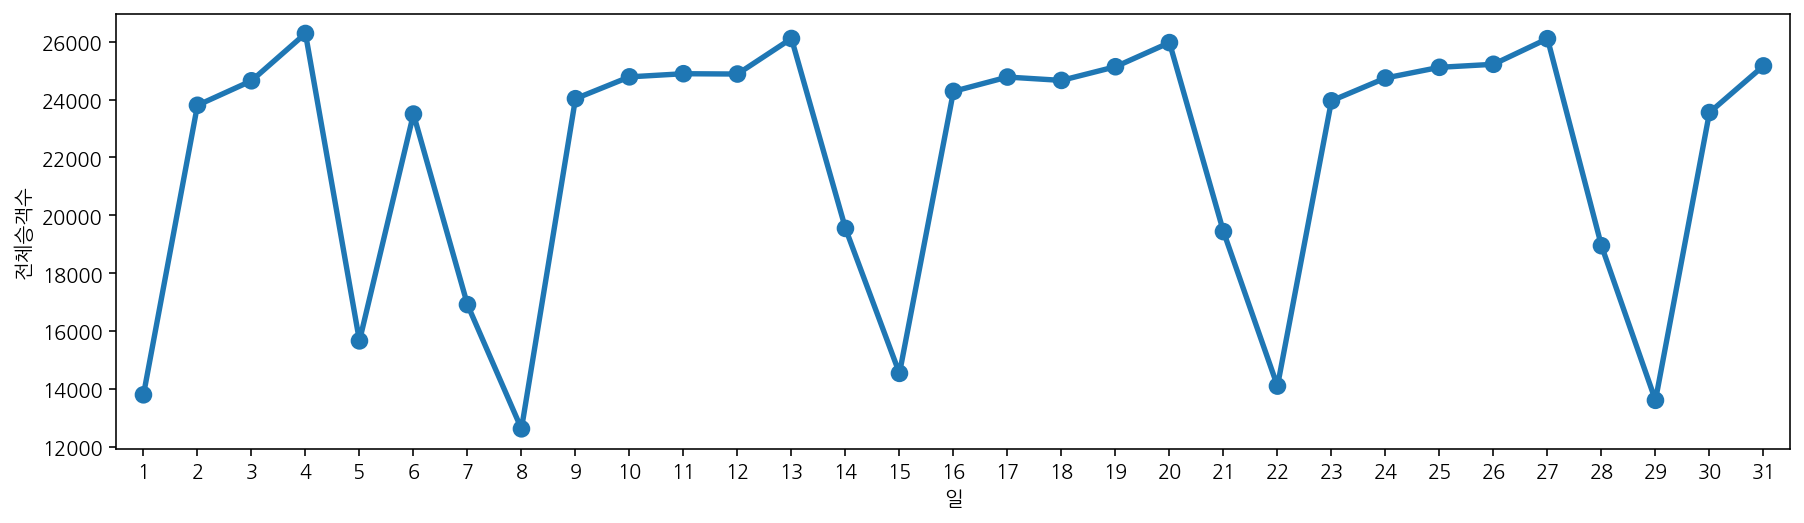

In [ ]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_5, x = '일', y = '전체승객수', ci=None)

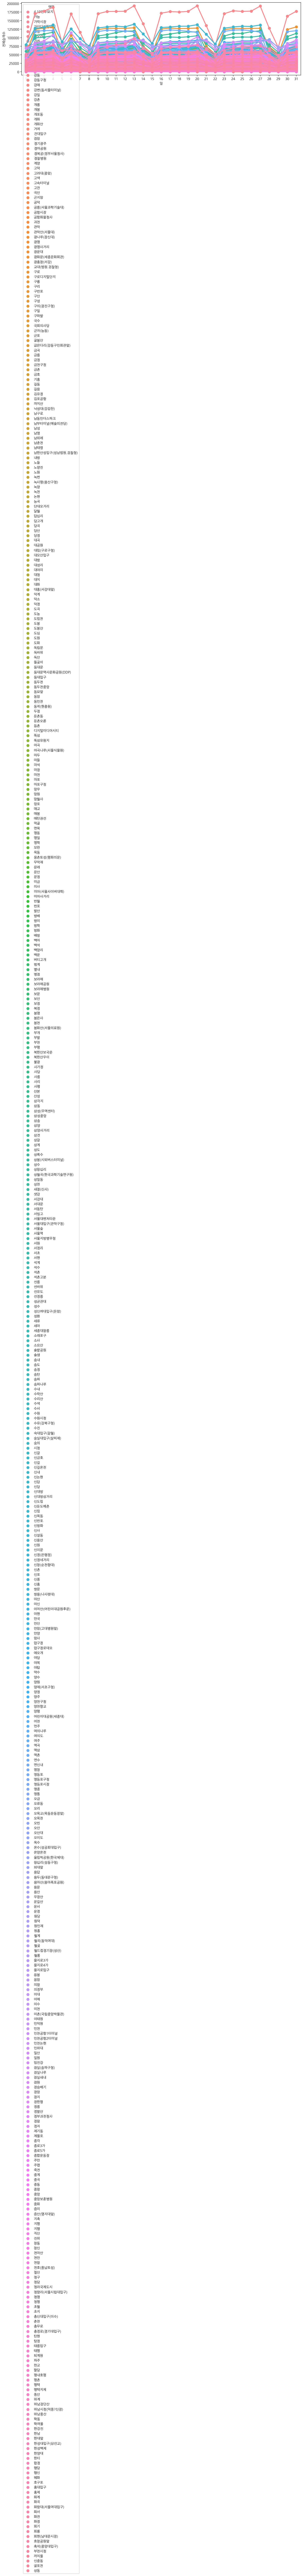

In [ ]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_5, x = '일', y = '전체승객수', ci=None, hue = '역명')

# 서울역, 부평역, 강남역

In [ ]:
df_local = df_5[df_5['역명'].isin(['서울역', '부평', '강남'])]

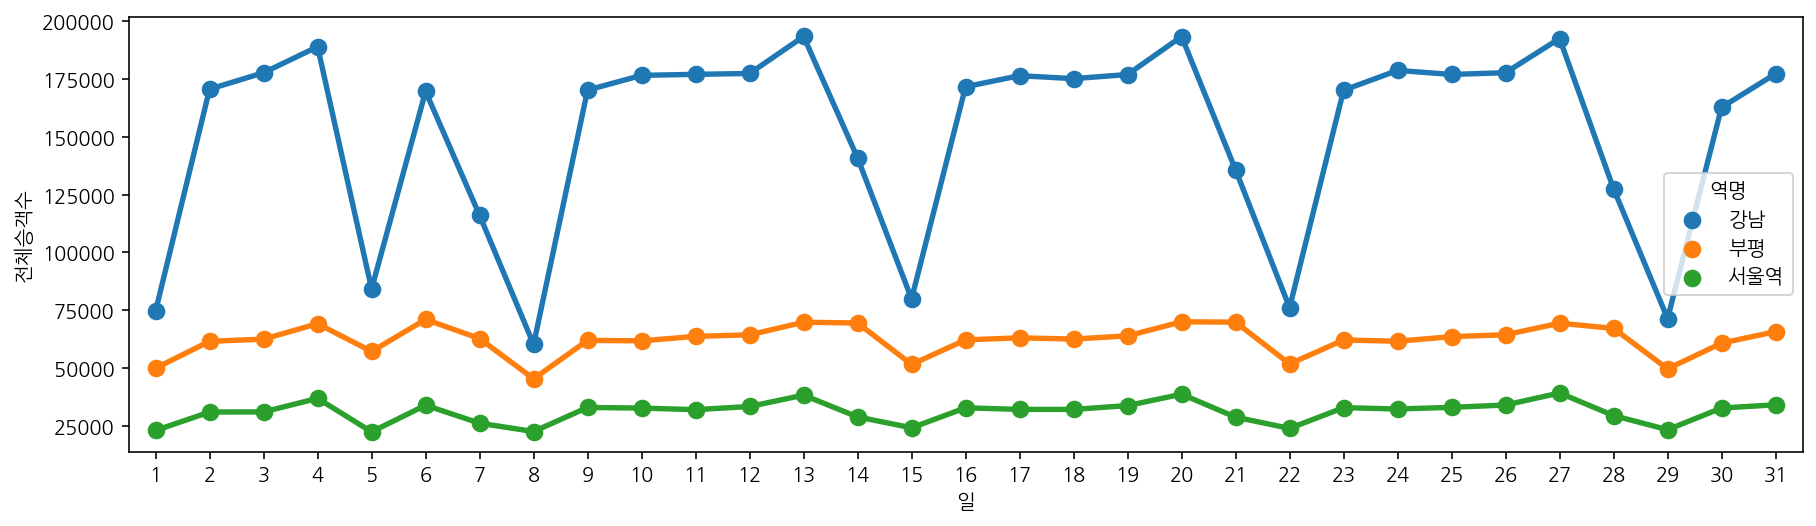

In [ ]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_local , x = '일', y = '전체승객수', ci=None, hue = '역명')